In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_excel("/Users/jaineet/Desktop/Nirma/SEM-5/Machine Learning/IA-2/Train_Data.xlsx")
df.head()

,Open,High,Low,Volume,Adj Close
0,2450.0,2542.550049,2431.000000,5572.0,2398.945068
1,2575.0,2598.000000,2530.300049,3620.0,2406.021484
2,2540.0,2599.000000,2422.550049,8347.0,2431.730957
3,2535.0,2560.000000,2470.000000,2831.0,2370.639404
4,2545.0,2555.000000,2480.000000,5054.0,2357.806885


In [184]:
df1 = pd.read_excel("/Users/jaineet/Desktop/Nirma/SEM-5/Machine Learning/IA-2/test_data.xls")
df1.head()


,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Open,High,Low,Volume
1,67299,67299,66500.4,4193
2,66500,67100,66150.7,7531
3,66750,67400,66458.7,4603
4,66999.7,67349.9,66201,4278


In [185]:
new_header = df1.iloc[0] 
df1 = df1[1:] 
df1.columns = new_header
df1.head()

,Open,High,Low,Volume
1,67299,67299,66500.4,4193
2,66500,67100,66150.7,7531
3,66750,67400,66458.7,4603
4,66999.7,67349.9,66201,4278
5,67100,67345.9,66666.1,6823


In [3]:
df.describe()

,Open,High,Low,Volume,Adj Close
count,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000
mean,21101.244834,21375.378391,20820.465856,9208.149202,20889.462389
std,22792.586531,23032.304943,22535.779161,11221.489628,22709.916485
min,1525.000000,1549.949951,1470.000000,0.000000,1490.531982
25%,3990.000000,4090.000000,3910.550049,2831.000000,3833.391602
50%,9123.950195,9285.000000,8950.000000,6335.000000,8896.114258
75%,35502.699219,35990.000000,35150.601563,11287.000000,35201.992188
max,80998.000000,81426.000000,79720.000000,158414.000000,80526.093750


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Volume', 'Adj Close'], dtype='object')

In [5]:
df = df.rename(columns={'Adj Close': 'Close'})

In [6]:
df.dropna(inplace=True)

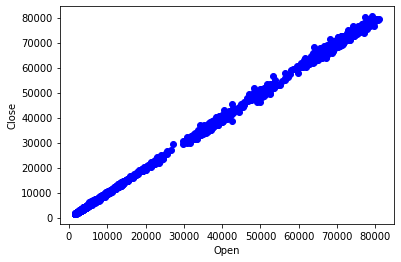

In [7]:
plt.scatter(df.Open, df.Close, color='blue')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

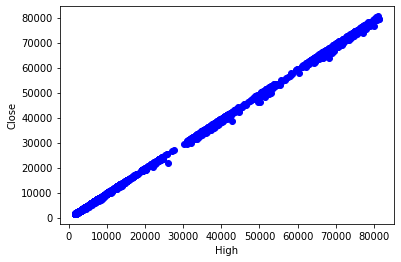

In [8]:
plt.scatter(df.High, df.Close, color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

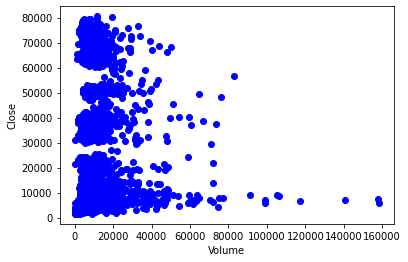

In [9]:
plt.scatter(df.Volume, df.Close, color='blue')
plt.xlabel("Volume")
plt.ylabel("Close")
plt.show()

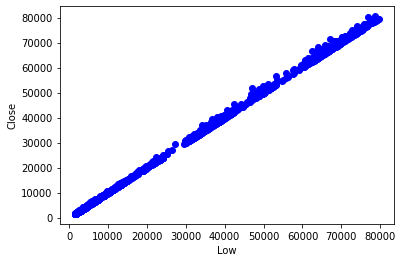

In [10]:
plt.scatter(df.Low, df.Close, color='blue')
plt.xlabel("Low")
plt.ylabel("Close")
plt.show()

In [159]:
x = np.array(df[['Open','High','Low','Volume']])
y = np.array(df[['Close']])

In [160]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.4, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2067, 4) (2067, 1)
Test set: (1378, 4) (1378, 1)


In [161]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

## MULTIPLE LINEAR REGRESSION 

In [162]:
reg = linear_model.LinearRegression()

In [163]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
pred = reg.predict(x_test)

In [165]:
r2_score(y_test,pred)

0.9998843691617101

In [166]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [167]:
print("MAE: ",metrics.mean_absolute_error(y_true = y_test,y_pred = pred))
print("MSE: ",metrics.mean_squared_error(y_true = y_test,y_pred = pred))
print("MAPE: ",mape(y_test,pred))
print(reg.coef_)

MAE:  170.6887326287491
MSE:  58580.361896375485
MAPE:  2.0410573606650746
[[-0.69886394  0.87572604  0.81879618 -0.0009907 ]]


## ROLLING AVERAGE

In [47]:
df['pandas_SMA_3'] = df.iloc[:,4].rolling(window=3).mean()
df.head()

,Open,High,Low,Volume,Close,pandas_SMA_3
0,2450.0,2542.550049,2431.000000,5572.0,2398.945068,NaN
1,2575.0,2598.000000,2530.300049,3620.0,2406.021484,NaN
2,2540.0,2599.000000,2422.550049,8347.0,2431.730957,2412.232503
3,2535.0,2560.000000,2470.000000,2831.0,2370.639404,2402.797282
4,2545.0,2555.000000,2480.000000,5054.0,2357.806885,2386.725749


## KNN 

In [48]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9],'weights':['uniform','distance']}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [49]:
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [50]:
print("MAE: ",metrics.mean_absolute_error(y_true = y_test,y_pred = preds))
print("MSE: ",metrics.mean_squared_error(y_true = y_test,y_pred = preds))
print("MAPE: ",mape(y_test,preds))

MAE:  20535.444573081208
MSE:  928299768.7364621
MAPE:  99.97534003981973


In [51]:
print(model.best_params_)

{'n_neighbors': 2, 'weights': 'distance'}


## LSTM (DEEP LEARNING)

In [52]:
data = df.filter(['Close'])

In [53]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = data.values

In [54]:
training_data_len = math.ceil( len(dataset) *.8) 
scaled_data = scaler.fit_transform(dataset)
training_data_len

2756

In [55]:
train_data = scaled_data[0:training_data_len  , : ]
X_train=[]
Y_train = []
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    Y_train.append(train_data[i,0])

In [56]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [57]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
model.fit(X_train, Y_train, batch_size =1 , epochs = 1)

2696/2696 [==============================] - 40s 15ms/step - loss: 4.3664e-04


In [61]:
test_data = scaled_data[training_data_len - 60: , : ]
X_test = []
Y_test =  dataset[training_data_len:,:]  

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [62]:
X_test = np.array(X_test)

In [63]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [64]:
predictions = model.predict(X_test) 

predictions = scaler.inverse_transform(predictions)

In [65]:
print("MAE: ",metrics.mean_absolute_error(y_true = Y_test,y_pred = predictions))
print("MSE: ",metrics.mean_squared_error(y_true = Y_test,y_pred = predictions))
print("MAPE: ",mape(Y_test,predictions))

MAE:  2624.879461996554
MSE:  10153918.16150219
MAPE:  4.162508758616573


In [98]:
p = reg.predict(df1)

## Gradient Boosting

In [14]:
r = GradientBoostingRegressor(random_state=0)

In [18]:
r.fit(x_train,y_train)

/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
predic = r.predict(x_test)

In [22]:
print("MAE: ",metrics.mean_absolute_error(y_true = y_test,y_pred = predic))
print("MSE: ",metrics.mean_squared_error(y_true = y_test,y_pred = predic))
print("MAPE: ",mape(y_test,predic))

MAE:  20536.162433886642
MSE:  928349354.5715733
MAPE:  99.9841806434437


## RIDGE REGRESSION (MULTIPLE LINEAR REGRESSION WITH REGULARIZARTION) 
## ---> SELECTED

In [177]:
clf = Ridge(alpha=10,solver = 'lsqr' )

In [178]:
clf.fit(x_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='lsqr', tol=0.001)

In [179]:
pre = clf.predict(x_test)

In [180]:
print("MAE: ",metrics.mean_absolute_error(y_true = y_test,y_pred = pre))
print("MSE: ",metrics.mean_squared_error(y_true = y_test,y_pred = pre))
print("MAPE: ",mape(y_test,pre))
print(clf.coef_)

MAE:  321.1296177913352
MSE:  297759.5826702671
MAPE:  2.206821130660647
[[0.32471358 0.32702923 0.3266261  0.0097587 ]]


## LASSO REGRESSION

In [134]:
l = Lasso(alpha=0.1)

In [135]:
l.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [136]:
pred = l.predict(x_test)

In [137]:
print("MAE: ",metrics.mean_absolute_error(y_true = y_test,y_pred = pred))
print("MSE: ",metrics.mean_squared_error(y_true = y_test,y_pred = pred))
print("MAPE: ",mape(y_test,pred))

MAE:  20536.899057279043
MSE:  928379609.9494652
MAPE:  99.99601073461253


## MODEL FILE FOR RIDGE REGRESSION

In [188]:
import pickle

In [189]:
P_file = "18BCE079_18BCE083_18BCE095_18BCE104.pkl"  

with open(P_file, 'wb') as file:  
    pickle.dump(clf, file)

In [190]:
with open(P_file, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='lsqr', tol=0.001)